# Suicides Dataset
For this dataset I will focus on three different points of view.
- Differences over sex and age of suicides/100k pop.
- Relationship between GDP and suicides over the years.
- Comparison between poorest and richest countries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploring
First let's examine and clean the data.

In [2]:
df = pd.read_csv('../input/master.csv')
df.sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
6916,Cuba,2015,male,5-14 years,4,636828,0.63,Cuba2015,NaN,"87,132,800,000",8044,Generation Z
24298,Suriname,2009,male,55-74 years,12,24763,48.46,Suriname2009,NaN,"3,875,409,836",8238,Silent
10804,Guatemala,1994,male,55-74 years,10,336518,2.97,Guatemala1994,NaN,"12,983,235,568",1538,Silent
16984,Montenegro,2003,female,35-54 years,0,86276,0.00,Montenegro2003,NaN,"1,707,710,053",2946,Boomers
2281,Azerbaijan,1999,female,55-74 years,2,497100,0.40,Azerbaijan1999,NaN,"4,581,222,442",645,Silent


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [4]:
# Strip whitespace since some of the columns would become harder to name.
df.columns = df.columns.str.strip()

# Drop unnecessary columns for the analysis objectives.
df.drop(columns=['suicides_no', 'country-year', 'HDI for year', 'gdp_for_year ($)', 'generation'], inplace=True)

df.sample(5)

,country,year,sex,age,population,suicides/100k pop,gdp_per_capita ($)
2140,Austria,2014,female,55-74 years,993973,10.87,54278
20497,Republic of Korea,2007,male,35-54 years,8320051,34.88,23982
21815,Saint Vincent and Grenadines,2006,male,15-24 years,10473,9.55,6142
8492,Estonia,2006,female,55-74 years,170020,10.00,13264
22574,Singapore,1999,female,35-54 years,527100,7.40,28789


In [5]:
# Rename columns for easier readability.
df.rename(columns={'suicides/100k pop':'suicides', 'gdp_per_capita ($)':'gpd'}, inplace=True)

df.head()

,country,year,sex,age,population,suicides,gpd
0,Albania,1987,male,15-24 years,312900,6.71,796
1,Albania,1987,male,35-54 years,308000,5.19,796
2,Albania,1987,female,15-24 years,289700,4.83,796
3,Albania,1987,male,75+ years,21800,4.59,796
4,Albania,1987,male,25-34 years,274300,3.28,796


# Data Analysis
Now that our data is ready, let's perform the analysis previously mentioned.

## Suicides by sex and age

In [6]:
suicides_sex_age = df[['sex', 'age', 'suicides']].groupby(['sex', 'age']).mean()
suicides_sex_age

suicides
sex    age                   
female 15-24 years   4.328018
       25-34 years   4.573210
       35-54 years   5.916480
       5-14 years    0.462252
       55-74 years   7.123447
       75+ years     9.919802
male   15-24 years  13.566290
       25-34 years  19.800560
       35-54 years  23.978402
       5-14 years    0.777831
       55-74 years  25.187712
       75+ years    37.991017

In [7]:
# Reorder age index for visualization.
suicides_sex_age.reset_index(inplace=True)
suicides_sex_age['age'] = suicides_sex_age['age'].str.replace(' years', '')

age_sort = {'5-14': 0, '15-24': 1, '25-34': 2, '35-54': 3, '55-74': 4, '75+': 5}
suicides_sex_age['sort'] = suicides_sex_age['age'].map(age_sort)
suicides_sex_age.sort_values(by='sort', inplace=True)
suicides_sex_age.drop('sort', axis=1, inplace=True)

suicides_sex_age

,sex,age,suicides
3,female,5-14,0.462252
9,male,5-14,0.777831
0,female,15-24,4.328018
6,male,15-24,13.566290
1,female,25-34,4.573210
7,male,25-34,19.800560
2,female,35-54,5.916480
8,male,35-54,23.978402
4,female,55-74,7.123447
10,male,55-74,25.187712


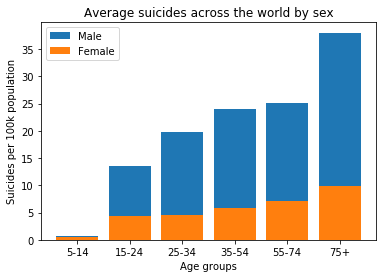

In [48]:
age_groups = suicides_sex_age['age'].unique()
male_suicides = suicides_sex_age[suicides_sex_age['sex'] == 'male']['suicides']
female_suicides = suicides_sex_age[suicides_sex_age['sex'] == 'female']['suicides']

plt.bar(age_groups, male_suicides, label='Male')
plt.bar(age_groups, female_suicides, label='Female')

plt.title('Average suicides across the world by sex')
plt.xlabel('Age group')
plt.ylabel('Suicides per 100k population')
plt.legend()
plt.show()

Males commit suicide significantly higher than females, with and average difference of 15 suicides per 100k of population. Interestingly this difference becomes greater at older ages.

## Suicides vs GPD

In [9]:
suicides_vs_gpd = df[['suicides', 'year', 'gpd']].groupby('year').mean()
suicides_vs_gpd.reset_index(inplace=True)

suicides_vs_gpd.head()

,year,suicides,gpd
0,1985,11.826198,6091.229167
1,1986,11.423333,7126.104167
2,1987,11.644213,8712.592593
3,1988,12.709405,9983.857143
4,1989,12.879071,9725.038462


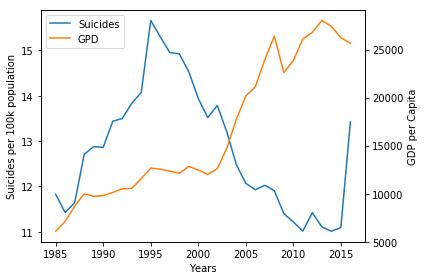

In [10]:
fig, ax1 = plt.subplots()

# Plot the suicides over the years.
lns1 = ax1.plot(suicides_vs_gpd['year'], suicides_vs_gpd['suicides'], 'C0', label='Suicides')

# Create a shared axis for plotting on a different scale the GPD.
ax2 = ax1.twinx()
lns2 = ax2.plot(suicides_vs_gpd['year'], suicides_vs_gpd['gpd'], 'C1', label='GPD')

# Join both legends into the same box.
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=2)

# Set the labels.
ax1.set_ylabel('Suicides per 100k population')
ax2.set_ylabel('GDP per Capita')
ax1.set_xlabel('Years')

plt.tight_layout()
plt.show()

As we would expect as the world got richer, the number of suicides went down. Something unexpected happened the year 2016, where the suicides per 100k of population were as higher as in 2002.

## Comparison: Rich vs Poor

In [16]:
suicides_poor_rich = df[['year', 'country', 'gpd', 'suicides']]

# Sort the the countries by their average gpd over the years.
# Then get the list of the countries ordered.
countries_by_gpd = suicides_poor_rich.groupby('country').mean().sort_values('gpd', ascending=False).index

In [17]:
# Get the top and bottom 5 countries of the list.
top_countries = countries_by_gpd[:5]
bot_countries = countries_by_gpd[-5:]

# Append them for the future filter.
countries_to_compare = top_countries.append(bot_countries)
countries_to_compare

Index(['Luxembourg', 'Qatar', 'Switzerland', 'Norway', 'San Marino',
       'Azerbaijan', 'Uzbekistan', 'Sri Lanka', 'Kiribati', 'Kyrgyzstan'],
      dtype='object', name='country')

In [18]:
# Filter the rows that only are one of those countries.
suicides_poor_rich = suicides_poor_rich.loc[suicides_poor_rich['country'].isin(countries_to_compare)]
suicides_poor_rich.sample(5)

,year,country,gpd,suicides
24728,1995,Switzerland,51774,34.87
15433,1995,Luxembourg,56499,8.80
15536,2004,Luxembourg,80639,26.29
15633,2012,Luxembourg,113120,15.12
15656,2014,Luxembourg,126352,22.67


In [19]:
# Create a filter for splitting those countries into two groups.
country_filter = {country:'TOP' for country in top_countries}
country_filter.update({country:'BOT' for country in bot_countries})

country_filter

{'Luxembourg': 'TOP',
 'Qatar': 'TOP',
 'Switzerland': 'TOP',
 'Norway': 'TOP',
 'San Marino': 'TOP',
 'Azerbaijan': 'BOT',
 'Uzbekistan': 'BOT',
 'Sri Lanka': 'BOT',
 'Kiribati': 'BOT',
 'Kyrgyzstan': 'BOT'}

In [20]:
# Apply the filter.
suicides_poor_rich['country'] = suicides_poor_rich['country'].map(country_filter)
suicides_poor_rich.sample(5)

,year,country,gpd,suicides
27628,1996,BOT,703,26.61
15459,1997,TOP,50260,4.24
15539,2004,TOP,80639,14.69
27731,2004,BOT,516,3.44
27566,1990,BOT,778,1.63


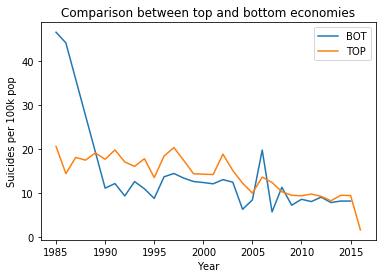

In [52]:
# Simply, plot the results.
sns.lineplot(x='year', y='suicides', data=suicides_poor_rich, hue='country', ci=None)
plt.legend(labels=['BOT', 'TOP'])

plt.title('Comparison between top and bottom economies')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k pop')
plt.show()

As we can see, the poorest countries got even below the richest countries for almost two decades. That can be due to the fact that the life-expectancy is lower on those countries, and, as we saw ealier the huge part of the total suicides are commited at the lastests stages of life.

# Conclusions
We found some interesting insights about how suicides are correlated to age, sex and gpd. Also, we found some anomalies such as the suicides for older age groups, or the dramatic increase in suicides from 2015 to 2016. These last two will be interesnting to analyse in further projects.

I hope you liked the analysis.